# **Data Cleaning**

Data cleaning is a crucial step in the data analysis process, ensuring that your dataset is accurate, consistent, and reliable. Below is a comprehensive guide to cleaning the provided dataset (AB_NYC_2019.csv), addressing key concepts and challenges in data cleaning.

**1. Load the dataset**

First, we will load the dataset into a Pandas DataFrame.

In [ ]:
import pandas as pd

In [ ]:
# Load the dataset
path= '/content/AB_NYC_2019.csv'
data = pd.read_csv(path)

In [ ]:
# Display the first few rows of the dataset
print(data.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

**2. Data Integrity Checks**

Check for data types and basic statistics to understand the structure of the dataset.

In [ ]:
# Check data types and non-null counts
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Summary statistics for numerical columns
print(data.describe())

                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

**3. Missing Data Handling**

Identify missing values and decide how to handle them (imputation or removal).

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [ ]:
# Handle missing values
data['last_review'].fillna('No Review', inplace=True)  # Impute with 'No Review'
data.dropna(subset=['price', 'minimum_nights'], inplace=True)  # Drop rows where price or minimum_nights are missing

<ipython-input-18-31ce93a6779c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['last_review'].fillna('No Review', inplace=True)  # Impute with 'No Review'


**4. Duplicate Removal**

Identify and remove duplicate records to maintain data uniqueness.

In [ ]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
# Remove duplicates if any exist
data.drop_duplicates(inplace=True)

**5. Standardization**

Ensure consistent formatting across the dataset, such as converting text to lowercase or standardizing units.

In [ ]:
# Standardize room_type to lowercase
data['room_type'] = data['room_type'].str.lower()

data['price'] = data['price'].astype(float)  # Ensure price is float type

**6. Outlier Detection**

Identify outliers that may skew analysis, particularly in numerical fields like price.

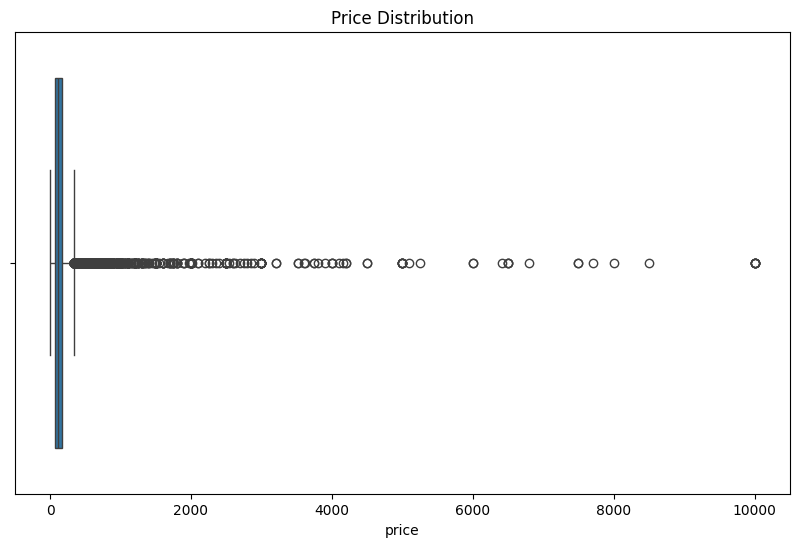

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize price distribution to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Price Distribution')
plt.show()

# Remove outliers based on a defined threshold
data = data[data['price'] < 1000]

**7. Final data review**

After cleaning, review the dataset to ensure all issues have been addressed.

In [ ]:
# Check the shape of the cleaned dataset and summary statistics again
print(f"Cleaned dataset shape: {data.shape}")
print(data.describe())

Cleaned dataset shape: (48597, 16)
                 id       host_id      latitude     longitude         price  \
count  4.859700e+04  4.859700e+04  48597.000000  48597.000000  48597.000000   
mean   1.902170e+07  6.763529e+07     40.728923    -73.952025    140.237299   
std    1.097769e+07  7.860145e+07      0.054579      0.046154    112.906258   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.476831e+06  7.831209e+06     40.690000    -73.982940     69.000000   
50%    1.967775e+07  3.084879e+07     40.722960    -73.955570    105.000000   
75%    2.914645e+07  1.074344e+08     40.763120    -73.936090    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990    999.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48597.000000       48597.000000       38706.000000   
mean         6.975019          23.375270           1.375349   
std         20.275227          44.650882           1.681966   
m

Conclusion:
This data cleaning process not only improves data quality but also enhances the reliability of your analysis outcomes.
Each step addresses specific challenges associated with messy data, ultimately leading to more reliable outcomes in subsequent analyses or modeling tasks.